# **Bakery Shop Simulation**
**Contributors:**


*   **Rasa Chekani**
*   **Tara Radfar**

Our goal here is to simulate a bakery shop with all its customers, employees (servers), and all the events which include arrival of customers, queuing, receiving service from the shop and leaving.
Bakery employees (servers) are our resource here which is limited and have to be shared between customers.
Also, some of our customers have special membership and don't need to wait for receiving service.

First we import the necessary python libraries for our simulation.
Then we set the parameters of our simulation. The main advantage of our code is that we can determine the number of servers for each simulation as a parameter therefore we can find the best parameters for best performance. Also we set a random seed for reproducibility.

In [ ]:
#Importing Libraries
import pandas as pd ,seaborn as sns, numpy as np ,matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')
# Set Seed For Reproducibility
np.random.seed(0)

# Distribution Parameters
arrival_time_mean = 10
arrival_time_standard_deviation = 5
service_time_mean = 15
service_time_standard_deviation = 2

# Number of Customers
number_of_customers = 1000

# Probability of a Customer Being Special
special_probability = 0.05
# Number of Servers
servers=2

Now we generate and visualize our simulation data. Normal Distribution is used for generating data, both Arrival Times & Service Times. We can see the result of data generation.

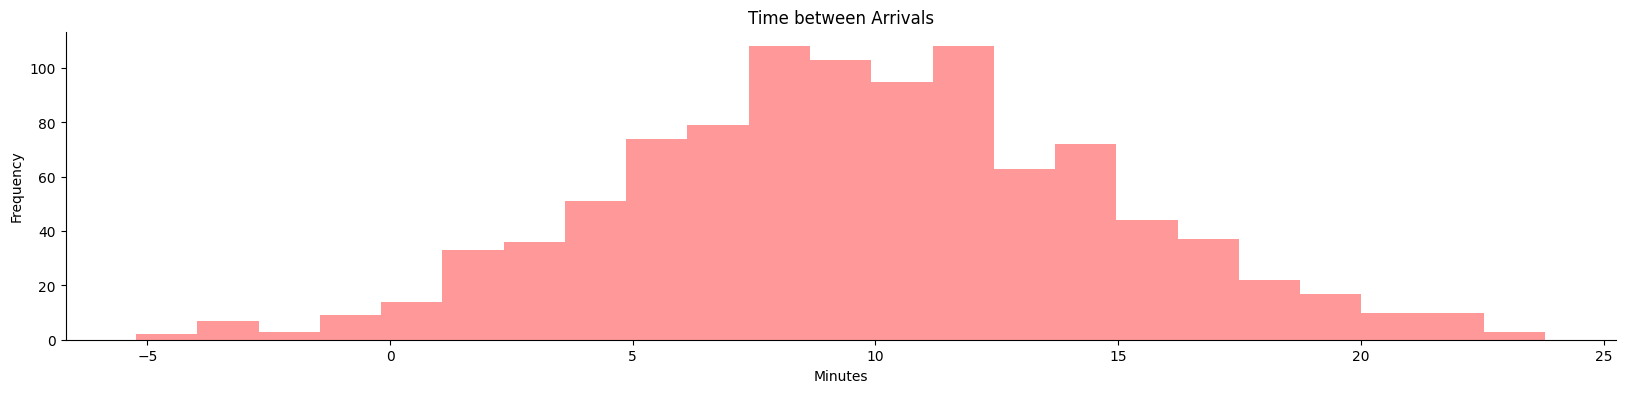

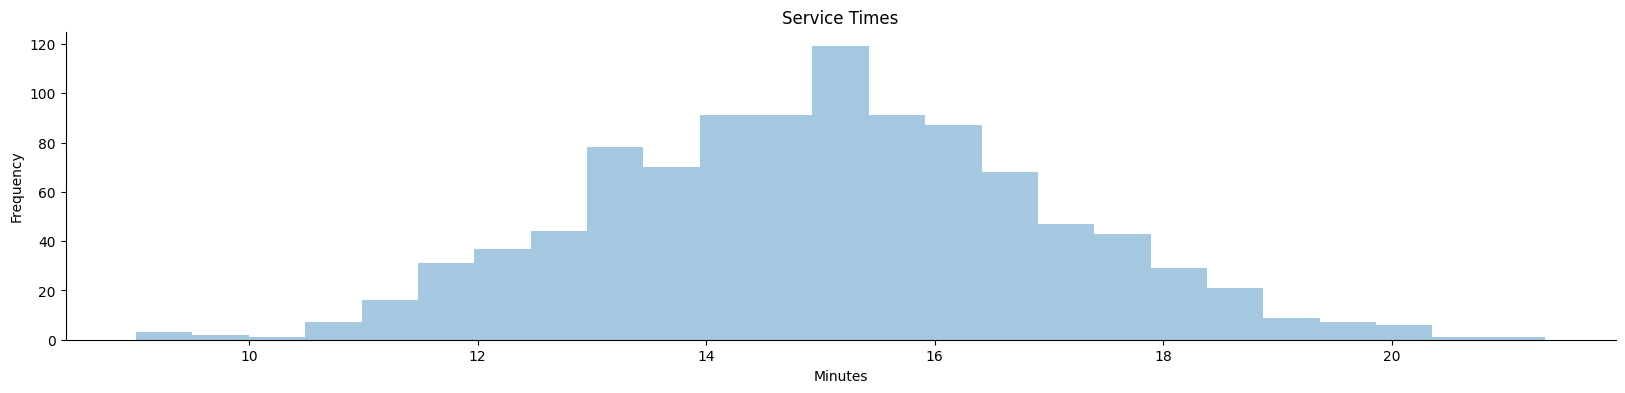

In [ ]:
#Generating Inter Arrival Times Using Normal Distribution
inter_arrival_times = list(np.random.normal(arrival_time_mean,arrival_time_standard_deviation,number_of_customers))

plt.figure(figsize=(20,4))
sns.distplot(inter_arrival_times,kde=False,color='r')
plt.title('Time between Arrivals')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

# List of Arrival Times of The People Joining The Queue
arrival_times= []
# List of Service Times For Each Person In Store
service_times = []
# List of Finish Times After Waiting and Being Served
finish_times = []
# Number of Special Customers
specialCounter = 0

arrival_times = [0 for i in range(number_of_customers)]
finish_times = [0 for i in range(number_of_customers)]


# Generate random service times for each customer
service_times = list(np.random.normal(service_time_mean,service_time_standard_deviation,number_of_customers))

plt.figure(figsize=(20,4))
sns.distplot(service_times,kde=False)
plt.title('Service Times')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
sns.despine()
plt.show()

Time for the real simulation. We generate finish times for each customer and calculate their waiting time in queue and their total time in our shop. Some of the customers have special membership and don't have to wait in queue for service.

In [ ]:
#Arrival of First Customer
arrival_times[0]=round(inter_arrival_times[0],2)
#Generate Arrival Times
for i in range(1,number_of_customers):
    arrival_times[i]=round((arrival_times[i-1]+inter_arrival_times[i]),2)

#Finish Time For First Customer
finish_times[0]=round((arrival_times[0]+service_times[0]),2)

#Generate Finish Times
for i in range(1,number_of_customers):
  previous_finish=finish_times[:i]
  previous_finish.sort(reverse=True)
  previous_finish=previous_finish[:servers]
  # Check if The Customer is Special
  if random.randrange(100) < special_probability:
    specialCounter += 1
    finish_times[i] = round(arrival_times[i] + service_times[i],4)
  else:
    if i< servers:
      finish_times[i] = round(arrival_times[i] + service_times[i],4)
    else:
      finish_times[i]=round((max(arrival_times[i],min(previous_finish))+service_times[i]),4)


     # Total Time Spent in The System by Each Customer
total_times =[abs(round((finish_times[i]-arrival_times[i]),2)) for i in range(number_of_customers)]


     # Time Spent at Waiting Before Being Served (Time Spent In The Queue)
wait_times = [abs(round((total_times[i] - service_times[i]),2)) for i in range(number_of_customers)]

Now we conclude our simluation. We create a dataframe with all the data of the model and summarize our results with creating a timeline of events. At the very end, we plot those results to see the outcome of our simulation. You can see the waiting time of each customer and the probability of having N customers in our shop.

Time Between Arrivals :  9.773716462549023 
 Service Time:  15.027233880632327 
Expected wait time in line:  2.0962899999999998 
 Expected time spent on the system:  17.1235 
 Expected number of customers in line:  0.38009698254506247 
 Expected number of clients in the system:  1.7476131829083688 
 Special Customers in simulation:  8 



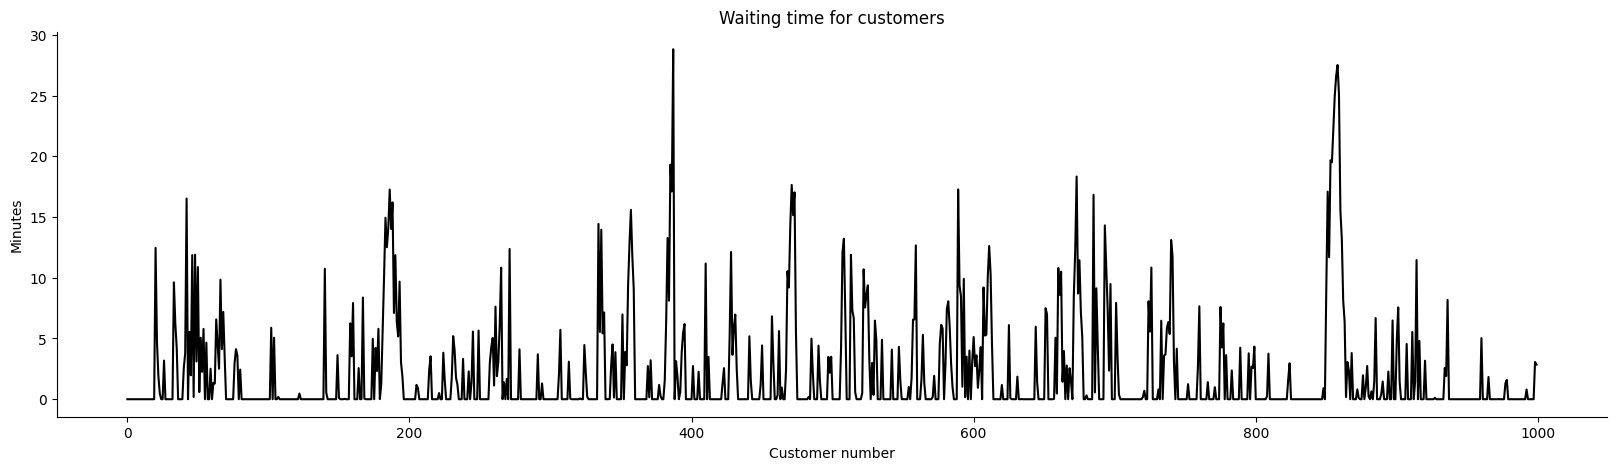

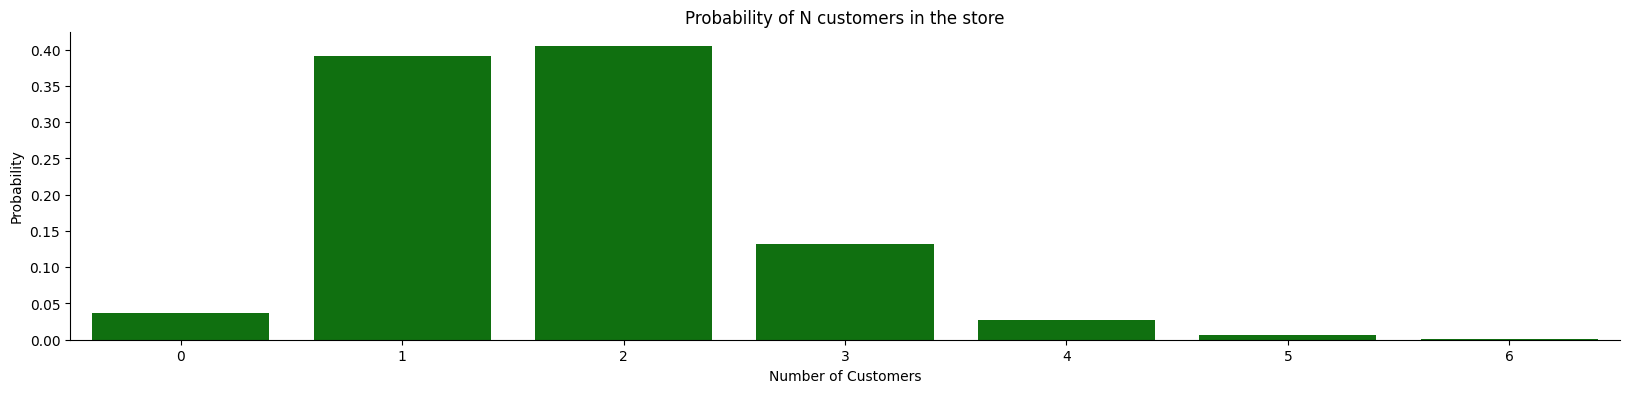

In [ ]:

#Creating a Dataframe Eith All The Data of The Model
data = pd.DataFrame(list(zip(arrival_times,service_times,total_times,finish_times,wait_times,inter_arrival_times)),
               columns =['arrival_times', 'service_times','total_times','finish_times','wait_times','inter_arrival_times'])

#Generating Time Between Events , And Aheir Description (Arrivals, Departures)

tbe=list([0])
timeline=['simulation starts']
for i in range(1,number_of_customers):
    tbe.append(data['arrival_times'][i])
    tbe.append(data['finish_times'][i])
    timeline.append('customer ' +str(i)+' arrived')
    timeline.append('customer ' +str(i)+' left')


#Creating a Dataframe to Summarize The Time Between Events
timeline = pd.DataFrame(list(zip(tbe,timeline)),
               columns =['time','Timeline']).sort_values(by='time').reset_index()
timeline=timeline.drop(columns='index')

#Generating The Number of Customers Inside The System At Any Given Time of The Simulation

timeline['n']=0
x=0
idletime=0
workingtime=0
for i in range(1,(2*number_of_customers)-2):
    if len(((timeline.Timeline[i]).split()))>2:
        z=str(timeline['Timeline'][i]).split()[2]
    else:
        continue
    if z =='arrived':
        x = x+1
        timeline['n'][i]=x
    else:
        x=x-1
        if x==-1:
            x=0
        timeline['n'][i]=x

    if timeline['n'][i]==0:
        idletime=idletime+ timeline['time'][i+1]-timeline['time'][i]
    else:
        workingtime= workingtime+ timeline['time'][i+1]-timeline['time'][i]

workingtime=workingtime+timeline['time'][2*number_of_customers-3]-timeline['time'][2*number_of_customers-2]


timeline.time.max()
workingtime+idletime

data['occupied']=[0 for i in range(number_of_customers)]
for i in range(1,number_of_customers):

    if data.arrival_times[i]>data.finish_times[i-1]:
        data['occupied'][i]=1
    else:
        data['occupied'][i]=0


t= list()
for i in timeline.index:
   if i == (2*number_of_customers) -2 :
       continue
   x=timeline.time[i+1]
   y=timeline.time[i]
   t.append(round((x-y),3))

t.append(0)
timeline['tbe']=t
Pn=timeline.groupby('n').tbe.agg(sum)/sum(t)



#Checking Central Tendency Measures
timeline.n.describe()
data.occupied.value_counts()

timeline['Lq']=0
for i in timeline.index:
    if timeline.n[i]>1:
        timeline.Lq[i]= timeline['n'][i]-servers


Ls=(sum(Pn*Pn.index))
Lq=sum((Pn.index[servers+1:]-1)*(Pn[servers+1:]))


print('Time Between Arrivals : ',str(data.inter_arrival_times.mean()),'\n',
      'Service Time: ',str(data.service_times.mean()),'\n'
      'Expected wait time in line: ',str(data['wait_times'].mean()),'\n',
      'Expected time spent on the system: ',str(data.total_times.mean()),'\n',
      'Expected number of customers in line: ',str(Lq),'\n',
      'Expected number of clients in the system: ',str(Ls),'\n',
      'Special Customers in simulation: ', str(specialCounter), '\n')



#Plots

plt.figure(figsize=(20,5))
sns.lineplot(x=data.index,y=wait_times,color='black')
plt.xlabel('Customer number')
plt.ylabel('Minutes')
plt.title('Waiting time for customers')
sns.despine()
plt.show()

plt.figure(figsize=(20,4))
sns.barplot(x=Pn.index,y=Pn,color='g')
plt.title('Probability of N customers in the store')
plt.xlabel('Number of Customers')
plt.ylabel('Probability')
sns.despine()
plt.show()





